# Lab 04. Text Classification


This lab is devoted to text classification tasks.
- **Part 1 [8 points]** is about very common NLP problem - sentiment analysis.
- **Part 2 [7 points]** include tasks on POS tagging and WordEmbeddings.


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit

- Name your file according to this convention: `lab04_GroupNo_Surname_Name.ipynb`. If you don't have group number, put `nan` instead.
- Attach it to an **email** with **topic** `lab04_GroupNo_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`


Data can be dowloaded from: https://disk.yandex.ru/d/ixeu6m2KBG80ig

The deadline is **2021-11-17 23:00:00 +03:00**

## Part 1. Bag of Words vs. Bag of Popcorn [8 points]

This task is based on [Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. The goal is to label film reviews as positive or negative. 

Reviews may look like this:

```
I dont know why people think this is such a bad movie. Its got a pretty good plot, some good action, and the change of location for Harry does not hurt either. Sure some of its offensive and gratuitous but this is not the only movie like that. Eastwood is in good form as Dirty Harry, and I liked Pat Hingle in this movie as the small town cop. If you liked DIRTY HARRY, then you should see this one, its a lot better than THE DEAD POOL. 4/5
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
reviews = pd.read_csv("data/reviews.tsv", sep="\t")
reviews.head(3)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...


In [3]:
X = reviews["review"]
y = reviews["sentiment"]

SEED = 42

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=SEED, stratify=y)

### Time to extract features

In this part of the assignment we will apply several methods of feature extraction and compare them.

**Task 1.1 [0.5 point] - Simple BOW** 

In this task we will build a simple bow representation - without any preprocessing. 

For this purpose we will use [*CountVectorizer*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) - a method that transforms text dataset into a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html).

Import CountVectorizer:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

Now try each of these approaches:
- fit vectorizer on X_train, apply to X_train, X_test
- fit vectorizer on X_train, apply to X_train; fit on X_test, apply to X_test
- fit vectorizer on X, apply to X_train, X_test

Report output matrix sizes in each case. 
- What is the difference? 
- Which of these approaches is the most fair and correct?

Use the most fair and correct one to get `X_train_0` and `X_test_0` - they will be needed for further tasks.

In [7]:
count_vectorizer = CountVectorizer()

X_train_0 = count_vectorizer.fit_transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print('X_train_0 matrix size is {}, X_test_0 matrix size is {}.'.format(X_train_0.shape, X_test_0.shape))

X_train_0 matrix size is (20000, 68482), X_test_0 matrix size is (5000, 68482).


In [8]:
count_vectorizer = CountVectorizer()

X_train_0 = count_vectorizer.fit_transform(X_train)
X_test_0 = count_vectorizer.fit_transform(X_test)

print('X_train_0 matrix size is {}, X_test_0 matrix size is {}.'.format(X_train_0.shape, X_test_0.shape))

X_train_0 matrix size is (20000, 68482), X_test_0 matrix size is (5000, 38591).


In [9]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print('X_train_0 matrix size is {}, X_test_0 matrix size is {}.'.format(X_train_0.shape, X_test_0.shape))

X_train_0 matrix size is (20000, 74849), X_test_0 matrix size is (5000, 74849).


The difference is in the number of columns of matrices we got, because we fitted the vectorizer on `X_train`, `X_test` and `X`, which contain different numbers of words.

We need to have the similar set of features for the training and test set, the second approach does not provide this. Neither `X_train` nor `X_test` contain all words from `X`, so training the vectorizer on `X` is redundant, therefore we will not use the third approach. It turns out the first approach is the most fair and correct, we will use this approach.

In [10]:
count_vectorizer = CountVectorizer()

X_train_0 = count_vectorizer.fit_transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print('X_train_0 matrix size is {}, X_test_0 matrix size is {}.'.format(X_train_0.shape, X_test_0.shape))

X_train_0 matrix size is (20000, 68482), X_test_0 matrix size is (5000, 68482).


**Task 1.2 [0.5 point] - S___se matrices**

What is the data type of `X_train_0` and `X_test_0`? What are those?

What differs them from usual np.arrays? Name several types how those special matrices are stored and what they are good for.

In [11]:
type(X_train_0), type(X_test_0)

(scipy.sparse.csr.csr_matrix, scipy.sparse.csr.csr_matrix)

*Answer:*

The data type of `X_train_0` and `X_test_0` is scipy.sparse.csr.csr_matrix (Compressed Sparse Row matrix). This is one of the special SciPy data types for storing sparse matrices, i.e. matrices in which most of the elements are zero.

np.array stores values of all matrix elements, while the Compressed Sparse Row matrix is represented using three one-dimensional arrays for the non-zero values, the extents of the rows, and the column indexes. SciPy has other data types for storing sparse matrices. The Compressed Sparse Column matrix is the same as the Compressed Sparse Row matrix except the column indices are compressed and read first before the row indices. The Compressed Sparse Row matrix and the Compressed Sparse Column matrix data types provide efficient arithmetic operations, efficient slicing and fast matrix vector products.  In the Dictionary Of Keys based sparse matrix a dictionary is used where a row and column index is mapped to a value. This is an efficient structure for constructing sparse matrices incrementally. All these data types reduce memory usage in the case of sparse matrices. [See more](https://machinelearningmastery.com/sparse-matrices-for-machine-learning/)

**Task 1.3 [1 points] - Training**

Train LogisticRegression and Random forest on this data representations.
- Compare training time 
- Compare Accuracy, precision, recall 
- Plot ROC Curve and calculate ROC AUC (don't forget to predict_proba) 
- Plot Precision-Recall curve and calculate f1-score (for example, with `plt.subplots(nrows=1, ncols=2)`)
- Print the trickiest misclassified objects. Why they were hard to classify? 


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time as tm

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [14]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=SEED)
lr_model = LogisticRegression(max_iter=1e5, random_state=SEED)

In [15]:
start = tm.time()
rf_model.fit(X_train_0, y_train)
end = tm.time()
print("{} training took {:.3f} seconds".format(rf_model, end - start))

RandomForestClassifier(n_estimators=500, random_state=42) training took 321.764 seconds


In [16]:
start = tm.time()
lr_model.fit(X_train_0, y_train)
end = tm.time()
print("{} training took {:.3f} seconds".format(lr_model, end - start))

LogisticRegression(max_iter=100000.0, random_state=42) training took 19.283 seconds


The LogisticRegression model trained significantly faster than the RandomForestClassifier model.

In [17]:
rf_pred = rf_model.predict(X_test_0)
lr_pred = lr_model.predict(X_test_0)

print("{} accuracy is {:.3f}".format(rf_model, accuracy_score(y_test, rf_pred)))
print("{} accuracy is {:.3f}\n".format(lr_model, accuracy_score(y_test, lr_pred)))

print("{} precision is {:.3f}".format(rf_model, precision_score(y_test, rf_pred)))
print("{} precision is {:.3f}\n".format(lr_model, precision_score(y_test, lr_pred)))

print("{} recall is {:.3f}".format(rf_model, recall_score(y_test, rf_pred)))
print("{} recall is {:.3f}\n".format(lr_model, recall_score(y_test, lr_pred)))

RandomForestClassifier(n_estimators=500, random_state=42) accuracy is 0.861
LogisticRegression(max_iter=100000.0, random_state=42) accuracy is 0.882

RandomForestClassifier(n_estimators=500, random_state=42) precision is 0.850
LogisticRegression(max_iter=100000.0, random_state=42) precision is 0.876

RandomForestClassifier(n_estimators=500, random_state=42) recall is 0.876
LogisticRegression(max_iter=100000.0, random_state=42) recall is 0.890



The LogisticRegression model has higher accuracy, precision and recall than the RandomForestClassifier model.

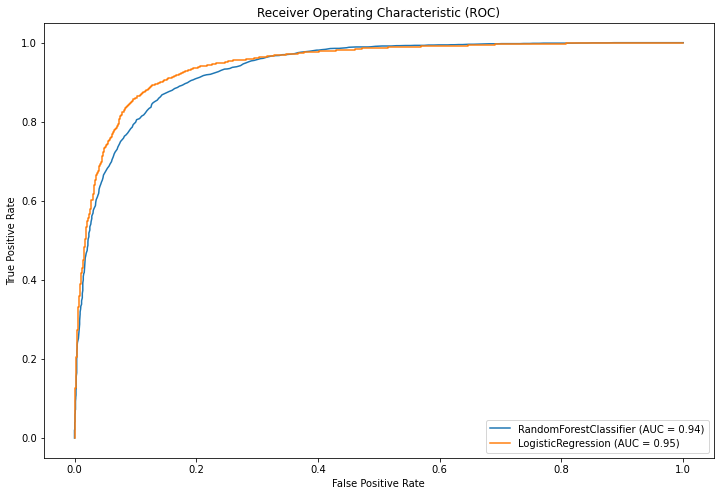

In [18]:
rf_pred_proba = rf_model.predict_proba(X_test_0)
lr_pred_proba = lr_model.predict_proba(X_test_0)
rf_false_positive_rate, rf_true_positive_rate, rf_threshholds = roc_curve(y_test, rf_pred_proba[:, 1])
rf_auc = roc_auc_score(y_test, rf_pred_proba[:, 1])
lr_false_positive_rate, lr_true_positive_rate, lr_threshholds = roc_curve(y_test, lr_pred_proba[:, 1])
lr_auc = roc_auc_score(y_test, lr_pred_proba[:, 1])

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(rf_false_positive_rate, rf_true_positive_rate, label="{} (AUC = {:.2f})".format(rf_model.__class__.__name__, rf_auc))
ax.plot(lr_false_positive_rate, lr_true_positive_rate, label="{} (AUC = {:.2f})".format(lr_model.__class__.__name__, lr_auc))
ax.set(xlabel="False Positive Rate", ylabel="True Positive Rate")
ax.legend(loc="lower right")
ax.set_title("Receiver Operating Characteristic (ROC)")
plt.show()

The LogisticRegression model has a larger Area Under the Receiver Operating Characteristic Curve (ROC AUC) than the RandomForestClassifier model.

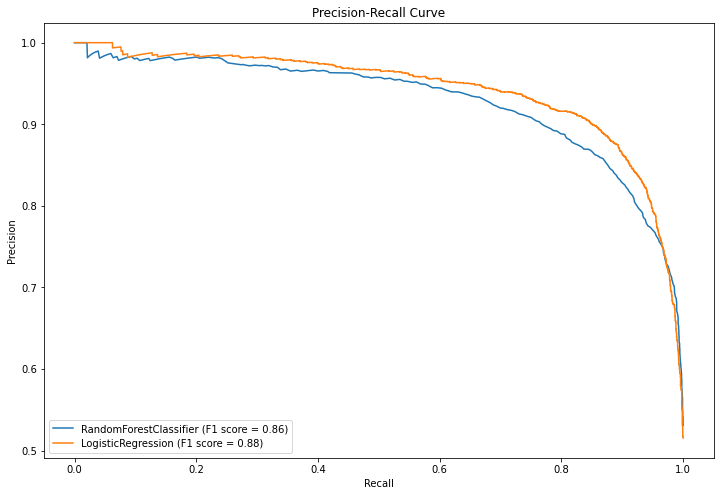

In [19]:
rf_precision, rf_recall, rf_threshholds = precision_recall_curve(y_test, rf_pred_proba[:, 1])
rf_f1_score = f1_score(y_test, rf_pred)
lr_precision, lr_recall, lr_threshholds = precision_recall_curve(y_test, lr_pred_proba[:, 1])
lr_f1_score = f1_score(y_test, lr_pred)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(rf_recall, rf_precision, label="{} (F1 score = {:.2f})".format(rf_model.__class__.__name__, rf_f1_score))
ax.plot(lr_recall, lr_precision, label="{} (F1 score = {:.2f})".format(lr_model.__class__.__name__, lr_f1_score))
ax.set(xlabel="Recall", ylabel="Precision")
ax.legend(loc="lower left")
ax.set_title("Precision-Recall Curve")
plt.show()

The LogisticRegression model has higher F1 score than the RandomForestClassifier model.

In [20]:
misclassified_objects_indices = y_test.index[y_test != lr_pred]
misclassified_objects = {
    'review': X_test[misclassified_objects_indices],
    'sentiment': y_test[misclassified_objects_indices]
}
misclassified_objects = pd.DataFrame(misclassified_objects)
misclassified_objects

,review,sentiment
22932,Chinese Ghost Story III is a totally superfluo...,0
7454,Verhoeven's movie was utter and complete garba...,1
6955,"This is a generally nice film, with good story...",1
19780,"Charleton Heston wore one, James Franciscus wo...",1
6547,After perusing the large amount of comments on...,0
...,...,...
5703,Cornel Wilde and three dumbbells search for su...,0
4299,When this play was first shown by the BBC over...,0
13424,A still famous but decadent actor (Morgan Free...,0
4617,"I saw this when it was in the theater, it star...",0


In [21]:
head = misclassified_objects.head()
for review, sentiment in zip(head.review, head.sentiment):
    print("Review:\n{}\nSentiment: {}\n".format(review, sentiment))

Review:
Chinese Ghost Story III is a totally superfluous sequel to two excellent fantasy films. The film delivers the spell-casting special effects that one can expect, but fails painfully on all other fronts. The actors all play extremely silly caricatures. You have to be still in diapers to find their slapstick humor even remotely funny. The plot is predictable, and the development is sometimes erratic and often slow. Towards the end, the movie begins to resemble old Godzilla films, including shabby larger-than-life special effects and a (well, yet another) ghost with a Godzilla head. Maybe I would have grinned if I was expecting camp.<br /><br />It is astonishing to see what trash fantasy fans have to put up with - in this case because somebody thought they could squeeze a little extra money out of a successful formula. They won't be able to do it again: the cash cow is now dead as a dodo.
Sentiment: 0

Review:
Verhoeven's movie was utter and complete garbage. He's a disgusting hack

As far as I have noticed, after reading a few misclassified reviews, they contain many words that would indicate they are in the opposite class, contain sarcasm, or their sentiment is difficult to determine even by a person, so it was hard to classify them.

Which model gives higher scores? Any ideas why? Please suggest 1-2 reasons.

*Answer:*

The LogisticRegression model gives higher scores. This may be so because the data turned out to be linearly separable, and the LogisticRegression model is designed to classify linearly separable data.

### More sophisticated feature prerocessing

As we have seen, simple BOW can give us some result - it's time to improve it.

**Task 1.4 [1 point] - Frequencies calculation**

- Calculate top-20 words in train set and test set. *Are they meaningful?*
- Import `stopwords` and print some of them. What are those?
- Recalculate top-20 words in each set, but exclude stop words.
- Does now top-20 include more useful words?

In [22]:
from collections import Counter
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

In [23]:
train_words = []
for review in X_train:
    train_words += TreebankWordTokenizer().tokenize(review)

test_words = []
for review in X_test:
    test_words += TreebankWordTokenizer().tokenize(review)

In [24]:
Counter(train_words).most_common(20)

[('the', 231895),
 (',', 221238),
 ('and', 125458),
 ('a', 125014),
 ('of', 115065),
 ('to', 106674),
 ('is', 86966),
 ('/', 81829),
 ('>', 81789),
 ('<', 81742),
 ('br', 81648),
 ('in', 69160),
 ('I', 65010),
 ('it', 57345),
 ('that', 55632),
 ("''", 52892),
 ("'s", 49352),
 ('this', 47765),
 ('was', 39726),
 ('as', 34629)]

In [25]:
Counter(test_words).most_common(20)

[('the', 57274),
 (',', 54649),
 ('a', 31031),
 ('and', 30817),
 ('of', 28421),
 ('to', 26454),
 ('is', 21371),
 ('/', 20265),
 ('>', 20247),
 ('<', 20229),
 ('br', 20222),
 ('in', 17501),
 ('I', 16030),
 ('it', 14080),
 ('that', 13637),
 ("''", 13013),
 ("'s", 12146),
 ('this', 11701),
 ('was', 9827),
 ('as', 8849)]

Top-20 words in train set and test set are articles, prepositions and punctuation marks that are meaningless for our purposes.

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Evgenia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Stop words are a set of commonly used low information words in a language.

In [28]:
train_words = [word.lower() for word in train_words if word.isalpha() and word != 'br']
test_words = [word.lower() for word in test_words if word.isalpha() and word != 'br']
train_words = list(filter(lambda word: word not in stopwords, train_words))
test_words = list(filter(lambda word: word not in stopwords, test_words))

In [29]:
Counter(train_words).most_common(20)

[('movie', 30201),
 ('film', 27751),
 ('one', 20038),
 ('like', 15737),
 ('good', 10701),
 ('would', 10664),
 ('even', 10139),
 ('really', 9277),
 ('see', 8898),
 ('story', 8370),
 ('time', 8056),
 ('much', 7469),
 ('could', 7431),
 ('get', 7253),
 ('also', 7243),
 ('first', 6972),
 ('people', 6962),
 ('great', 6800),
 ('well', 6755),
 ('bad', 6453)]

In [30]:
Counter(test_words).most_common(20)

[('movie', 7243),
 ('film', 6717),
 ('one', 4793),
 ('like', 3862),
 ('good', 2790),
 ('would', 2671),
 ('even', 2441),
 ('really', 2272),
 ('see', 2129),
 ('story', 2065),
 ('time', 2060),
 ('get', 1879),
 ('could', 1876),
 ('much', 1782),
 ('also', 1767),
 ('first', 1723),
 ('great', 1690),
 ('well', 1660),
 ('people', 1656),
 ('bad', 1607)]

Now top-20 words in train set and test set include more useful words.

**Task 1.5 [1 point] - Word Freqs by class**

How do you think, will top100 tokens for positive and negative classes be different? Use data to prove your point.

*Answer:*

I assume that if we compare the top-100 words of the positive and negative classes, considering the order of words in the top-100, we will get few matches. However, if we compare sets of the top-100 words of the positive and negative classes, there will be many matches, because they will be some frequently used common words, like "movie" or "see".

In [31]:
positive_reviews = X[y == 1]
negative_reviews = X[y == 0]

positive_words = []
for review in positive_reviews:
    positive_words += TreebankWordTokenizer().tokenize(review)
negative_words = []
for review in negative_reviews:
    negative_words += TreebankWordTokenizer().tokenize(review)

positive_words = [word.lower() for word in positive_words if word.isalpha() and word != 'br']
negative_words = [word.lower() for word in negative_words if word.isalpha() and word != 'br']
positive_words = list(filter(lambda word: word not in stopwords, positive_words))
negative_words = list(filter(lambda word: word not in stopwords, negative_words))

top_positive_words = [pair[0] for pair in Counter(positive_words).most_common(100)]
top_negative_words = [pair[0] for pair in Counter(negative_words).most_common(100)]

print("Number of matches if we consider the order of words in top-100 is {}".format(sum(list(map(lambda positive_word, negative_word: positive_word == negative_word, top_positive_words, top_negative_words)))))
print("Number of matches if we don't consider the order of words in top-100 is {}".format(len(set(top_positive_words).intersection(set(top_negative_words)))))

Number of matches if we consider the order of words in top-100 is 4
Number of matches if we don't consider the order of words in top-100 is 82


**Task 1.6 [2 points] - Reducing dimensionality**

The goal is to reduce number of features to 15000.

Implement the following methods of dimensinality reduction:
1. Use CountVectorizer, but leave only 15k most frequent tokens
2. Use HashingVectorizer with 15k features
3. Use 15k most important features from perspective of previously trained RandomForest

*Hints:*
- in 1 and 2 you don't have to apply nltk.corpus.stopwords, vectorizers have `stopwords` parameter
- in 1 look for `vocabulary` parameter
- in 3... remember `lab02`? You may use `X_train_0` and `X_test_0` as input matrices

Train LogisticRegression and RandomForest on each dataset and compare ROC AUC scores of the classifiers.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [33]:
train_vocabulary = [pair[0] for pair in Counter(train_words).most_common(15000)]
count_vectorizer_1 = CountVectorizer(stop_words='english', vocabulary=train_vocabulary)

X_train_1 = count_vectorizer_1.fit_transform(X_train)
X_test_1 = count_vectorizer_1.transform(X_test)

print('X_train_1 matrix size is {}, X_test_1 matrix size is {}.'.format(X_train_1.shape, X_test_1.shape))

X_train_1 matrix size is (20000, 15000), X_test_1 matrix size is (5000, 15000).


In [34]:
rf_model_1 = RandomForestClassifier(n_estimators=500, random_state=SEED)
lr_model_1 = LogisticRegression(max_iter=1e5, random_state=SEED)
rf_model_1.fit(X_train_1, y_train)
lr_model_1.fit(X_train_1, y_train)
rf_pred_proba_1 = rf_model_1.predict_proba(X_test_1)
lr_pred_proba_1 = lr_model_1.predict_proba(X_test_1)
print("{} ROC AUC is {:.3f}".format(rf_model_1, roc_auc_score(y_test, rf_pred_proba_1[:, 1])))
print("{} ROC AUC is {:.3f}".format(lr_model_1, roc_auc_score(y_test, lr_pred_proba_1[:, 1])))

RandomForestClassifier(n_estimators=500, random_state=42) ROC AUC is 0.932
LogisticRegression(max_iter=100000.0, random_state=42) ROC AUC is 0.938


In [35]:
hashing_vectorizer = HashingVectorizer(stop_words='english', n_features=15000)

X_train_2 = hashing_vectorizer.fit_transform(X_train)
X_test_2 = hashing_vectorizer.transform(X_test)

print('X_train_2 matrix size is {}, X_test_2 matrix size is {}.'.format(X_train_2.shape, X_test_2.shape))

X_train_2 matrix size is (20000, 15000), X_test_2 matrix size is (5000, 15000).


In [36]:
rf_model_2 = RandomForestClassifier(n_estimators=500, random_state=SEED)
lr_model_2 = LogisticRegression(max_iter=1e5, random_state=SEED)
rf_model_2.fit(X_train_2, y_train)
lr_model_2.fit(X_train_2, y_train)
rf_pred_proba_2 = rf_model_2.predict_proba(X_test_2)
lr_pred_proba_2 = lr_model_2.predict_proba(X_test_2)
print("{} ROC AUC is {:.3f}".format(rf_model_2, roc_auc_score(y_test, rf_pred_proba_2[:, 1])))
print("{} ROC AUC is {:.3f}".format(lr_model_2, roc_auc_score(y_test, lr_pred_proba_2[:, 1])))

RandomForestClassifier(n_estimators=500, random_state=42) ROC AUC is 0.929
LogisticRegression(max_iter=100000.0, random_state=42) ROC AUC is 0.941


In [37]:
rf_model_coefs = rf_model.feature_importances_
important_feature_idx = (-rf_model_coefs).argsort()[:15000].tolist()
important_vocabulary = count_vectorizer.get_feature_names_out()[important_feature_idx]
count_vectorizer_2 = CountVectorizer(stop_words='english', vocabulary=important_vocabulary)

X_train_3 = count_vectorizer_2.fit_transform(X_train)
X_test_3 = count_vectorizer_2.transform(X_test)

print('X_train_3 matrix size is {}, X_test_3 matrix size is {}.'.format(X_train_3.shape, X_test_3.shape))

X_train_3 matrix size is (20000, 15000), X_test_3 matrix size is (5000, 15000).


In [38]:
rf_model_3 = RandomForestClassifier(n_estimators=500, random_state=SEED)
lr_model_3 = LogisticRegression(max_iter=1e5, random_state=SEED)
rf_model_3.fit(X_train_3, y_train)
lr_model_3.fit(X_train_3, y_train)
rf_pred_proba_3 = rf_model_3.predict_proba(X_test_3)
lr_pred_proba_3 = lr_model_3.predict_proba(X_test_3)
print("{} ROC AUC is {:.3f}".format(rf_model_3, roc_auc_score(y_test, rf_pred_proba_3[:, 1])))
print("{} ROC AUC is {:.3f}".format(lr_model_3, roc_auc_score(y_test, lr_pred_proba_3[:, 1])))

RandomForestClassifier(n_estimators=500, random_state=42) ROC AUC is 0.932
LogisticRegression(max_iter=100000.0, random_state=42) ROC AUC is 0.938


In all cases the LogisticRegression model has a larger ROC AUC than the RandomForestClassifier model. The second method, using the HashingVectorizer, as we can see, is the best one.

**Task 1.7 [2 points] - Token Normalization**

Choose the best working method from previous task. Try improve it by applying a token normalization technique.

You may use one of normalizers imported below, but feel free to experiment.

Do the following:
- Apply normalizer to X_train, X_test
- Build BOW with CountVectorizer + stopwords. What are the shapes of train and test matrices now?
- Reduce dimensionality with the best method from Task 1.6. You may try all of them
- Train LR/RF to examine whether ROC AUC or Accuracy was improved.

In [39]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Evgenia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
lemmatizer = WordNetLemmatizer()

X_train_lemmatized = np.empty(X_train.shape, dtype=object)
for i, review in enumerate(X_train):
    X_train_lemmatized[i] = ' '.join([lemmatizer.lemmatize(word) for word in WhitespaceTokenizer().tokenize(review)])

X_test_lemmatized = np.empty(X_test.shape, dtype=object)
for i, review in enumerate(X_test):
    X_test_lemmatized[i] = ' '.join([lemmatizer.lemmatize(word) for word in WhitespaceTokenizer().tokenize(review)])

In [42]:
count_vectorizer_3 = CountVectorizer(stop_words='english')

X_train_lemmatized_0 = count_vectorizer_3.fit_transform(X_train_lemmatized)
X_test_lemmatized_0 = count_vectorizer_3.transform(X_test_lemmatized)

print('X_train_lemmatized_0 matrix size is {}, X_test_lemmatized_0 matrix size is {}.'.format(X_train_lemmatized_0.shape, X_test_lemmatized_0.shape))

X_train_lemmatized_0 matrix size is (20000, 66489), X_test_lemmatized_0 matrix size is (5000, 66489).


In [43]:
hashing_vectorizer_1 = HashingVectorizer(stop_words='english', n_features=15000)

X_train_lemmatized_1 = hashing_vectorizer_1.fit_transform(X_train_lemmatized)
X_test_lemmatized_1 = hashing_vectorizer_1.transform(X_test_lemmatized)

print('X_train_lemmatized_1 matrix size is {}, X_test_lemmatized_1 matrix size is {}.'.format(X_train_lemmatized_1.shape, X_test_lemmatized_1.shape))

X_train_lemmatized_1 matrix size is (20000, 15000), X_test_lemmatized_1 matrix size is (5000, 15000).


In [44]:
rf_model_4 = RandomForestClassifier(n_estimators=500, random_state=SEED)
lr_model_4 = LogisticRegression(max_iter=1e5, random_state=SEED)
rf_model_4.fit(X_train_lemmatized_1, y_train)
lr_model_4.fit(X_train_lemmatized_1, y_train)
rf_pred_proba_4 = rf_model_4.predict_proba(X_test_lemmatized_1)
lr_pred_proba_4 = lr_model_4.predict_proba(X_test_lemmatized_1)
print("{} ROC AUC is {:.3f}".format(rf_model_4, roc_auc_score(y_test, rf_pred_proba_4[:, 1])))
print("{} ROC AUC is {:.3f}".format(lr_model_4, roc_auc_score(y_test, lr_pred_proba_4[:, 1])))

RandomForestClassifier(n_estimators=500, random_state=42) ROC AUC is 0.929
LogisticRegression(max_iter=100000.0, random_state=42) ROC AUC is 0.939


As we can see, the ROC AUC has not been improved.

## Part 2. Word Embeddings [7 points]

In [45]:
import gensim.downloader

Here is the list of pretrained word embedding models. We suggest using `glove-wiki-gigaword-100`.

In [46]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [47]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

**Task 2.1 [2 point] - WordEmbeddings Geometry**

As you probably know, vector space of word embeddings has non-trivial geometry: some word relations (like country-capital or single-plural) can be represented by vectors, like: **(king - man) + woman = queen**

<img src="https://linkme.ufanet.ru/images/5687a2011b49eb2413912f1c7d0fb0bd.png" width=600px>

Check this statement on words from the above picture with `word_embeddings.most_similar` function. Pay attention to `positive` and `negative` params.

Provide **several** examples, make sure to present different relations: some for nouns, some for verbs.

In [48]:
def most_similar_word(positive1, positive2, negative):
    print('({} - {}) + {} = {}'.format(positive1, negative, positive2, word_embeddings.most_similar(positive=[positive1, positive2], negative=[negative])[0][0]))

most_similar_word('king', 'woman', 'man')
most_similar_word('dogs', 'cat', 'dog')
most_similar_word('france', 'london', 'england')
most_similar_word('speak', 'saw', 'see')
most_similar_word('dance', 'playing', 'play')
most_similar_word('learn', 'train', 'learns')
most_similar_word('her', 'he', 'she')
most_similar_word('horizontal', 'column', 'row')

(king - man) + woman = queen
(dogs - dog) + cat = cats
(france - england) + london = paris
(speak - see) + saw = spoke
(dance - play) + playing = dancing
(learn - learns) + train = trains
(her - she) + he = his
(horizontal - row) + column = vertical


It works! :)

**Task 2.2 [2 point] - POS analysis**

Use POS tagger to calculate most common POS in the dataset. 
Here you may read about nltk-taggers: [link](https://www.inf.ed.ac.uk/teaching/courses/icl/nltk/tagging.pdf)

- If you were to design POS-related weights, how would you do it? 
- What POS would get the higher weight? 

In [49]:
from nltk import pos_tag
from nltk.help import upenn_tagset

In [50]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Evgenia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
pos_list = []
for review in X_train:
    pos_list += [pair[1] for pair in pos_tag(WhitespaceTokenizer().tokenize(review))]

In [52]:
pos_counts = Counter(pos_list).most_common()
pos_counts

[('NN', 784409),
 ('IN', 527595),
 ('DT', 518809),
 ('NNP', 432905),
 ('JJ', 405860),
 ('RB', 250879),
 ('PRP', 205984),
 ('VBZ', 193231),
 ('CC', 176845),
 ('VB', 175119),
 ('NNS', 149679),
 ('VBD', 135740),
 ('VBP', 122013),
 ('TO', 107197),
 ('VBG', 85143),
 ('VBN', 84701),
 ('PRP$', 65104),
 ('CD', 48655),
 ('MD', 42607),
 ('WP', 27723),
 ('WRB', 25786),
 ('WDT', 25159),
 ('RP', 20494),
 ('JJS', 14110),
 ('JJR', 13034),
 ('EX', 9794),
 (':', 9422),
 ('RBR', 7973),
 ('PDT', 7128),
 ('RBS', 3913),
 ('.', 2002),
 ('NNPS', 1914),
 ('FW', 1803),
 ('POS', 1242),
 ('WP$', 753),
 (',', 687),
 ('SYM', 299),
 ('(', 287),
 ("''", 237),
 ('$', 212),
 ('UH', 167),
 (')', 149),
 ('#', 10),
 ('LS', 4),
 ('``', 3)]

In [53]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Evgenia\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [54]:
for pair in pos_counts:
    upenn_tagset(pair[0])

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
RB: a

If I were developing POS-related weights, I would rely on assumptions about the meaningfulness of parts of speech. I would assign the highest weights to adjectives, nouns, and verbs as the most meaningful parts of speech.

**Task 2.3 [3 points] - WordEmbeddings**

Use dense vector representations to construct vector-representation of each review, then train a model (LR or RF).

Compare results of the new model to results of the models above.
**Important**
- If you just sum embeddings of each token to get an embedding of the whole review, the cost of the task is **[2 points]**
- For **[3 points]** you have to use either TF-IDF weight or weights that you designed from POS tags.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

In [57]:
lr_model_5 = LogisticRegression(max_iter=1e5, random_state=SEED)
lr_model_5.fit(X_train_vectorized, y_train)
lr_pred_proba_5 = lr_model_5.predict_proba(X_test_vectorized)
print("{} ROC AUC is {:.3f}".format(lr_model_5, roc_auc_score(y_test, lr_pred_proba_5[:, 1])))

LogisticRegression(max_iter=100000.0, random_state=42) ROC AUC is 0.956


The LogisticRegression model's ROC AUC has been improved.